## Sanya Garg (2022UCA1826)
## AIHT Task 11

Real Estate Price Analysis

● Analyze house pricing trends using publicly available data from Zillow or Kaggle.

● Use scatterplots and heatmaps to show correlations between prices and features
like location or area.

In [ ]:
# Install required libraries (if not already installed)
if (!require(data.table)) install.packages("data.table", dependencies=TRUE)
if (!require(ggplot2)) install.packages("ggplot2", dependencies=TRUE)
if (!require(corrplot)) install.packages("corrplot", dependencies=TRUE)
if (!require(dplyr)) install.packages("dplyr", dependencies=TRUE)

# Load libraries
library(data.table)
library(ggplot2)
library(corrplot)
library(dplyr)

Loading required package: data.table

Loading required package: ggplot2

Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘seriation’, ‘prettydoc’


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded



In [ ]:
# Read dataset
data_path <- "kc_house_data.csv"
house_data <- fread(data_path)

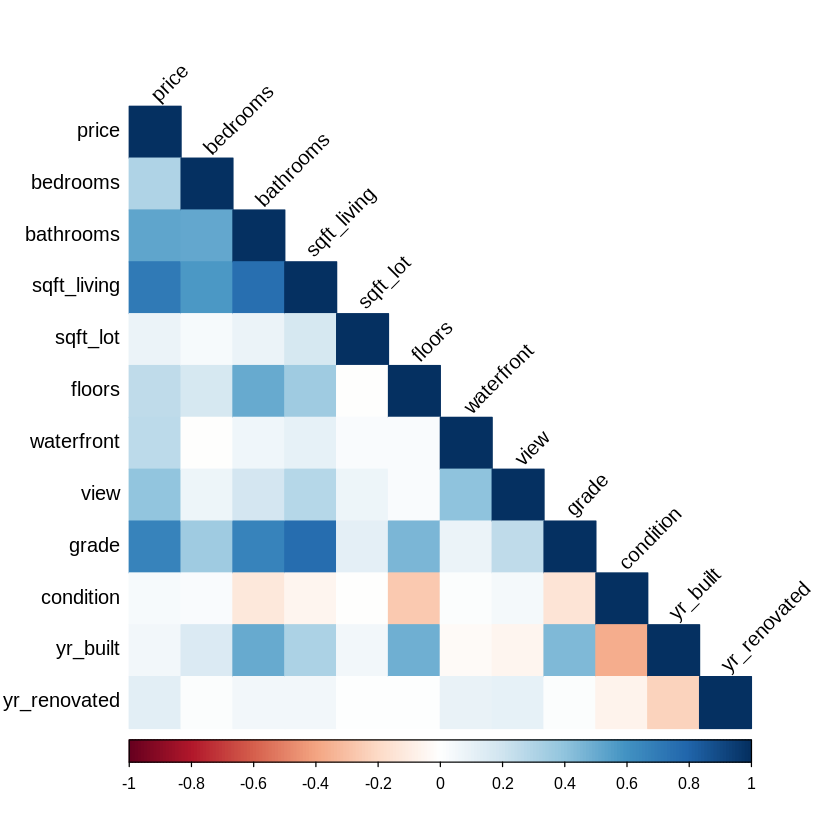

In [ ]:
# Select relevant columns
house_data <- house_data %>%
  select(price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, grade, condition, lat, long, yr_built, yr_renovated)

# Correlation Matrix
correlation_matrix <- cor(house_data %>% select(-lat, -long), use = "complete.obs")
corrplot(correlation_matrix, method = "color", type = "lower", tl.col = "black", tl.srt = 45)


`geom_smooth()` using formula = 'y ~ x'


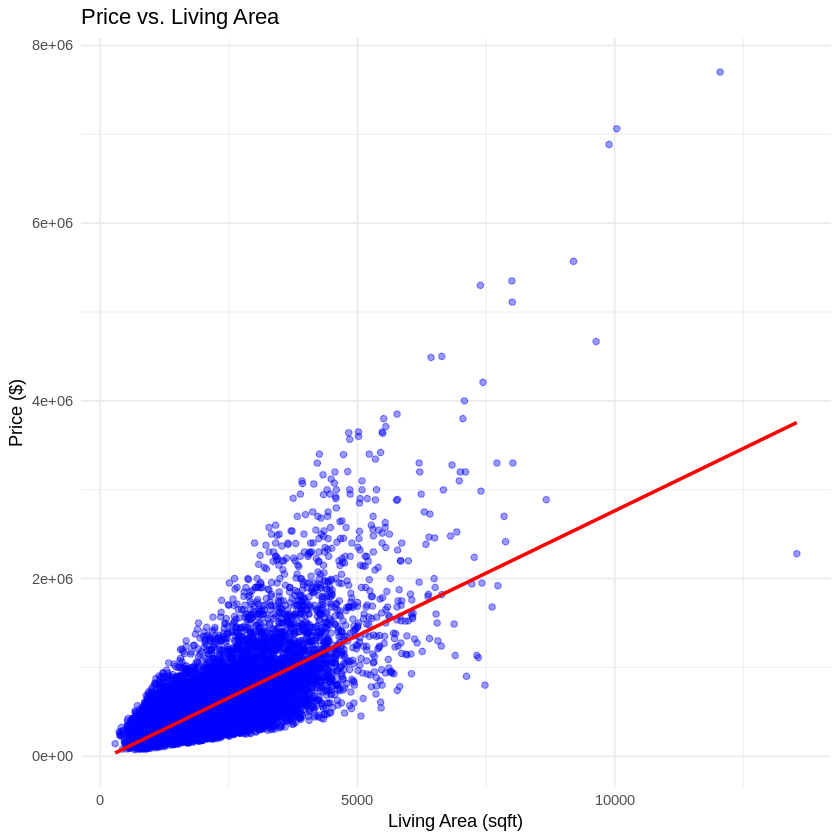

`geom_smooth()` using formula = 'y ~ x'


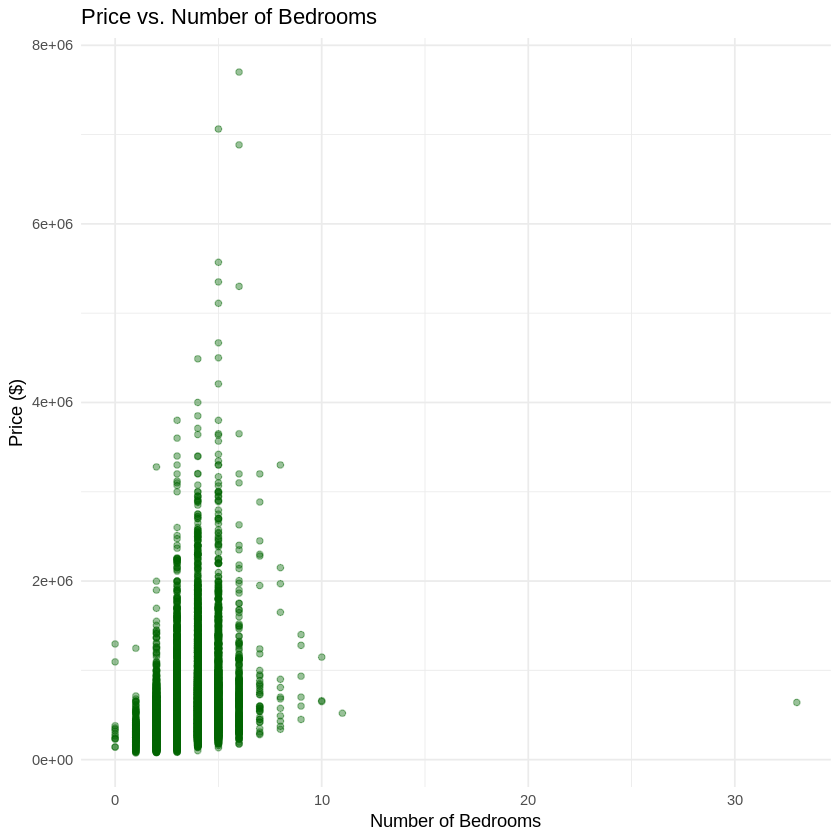

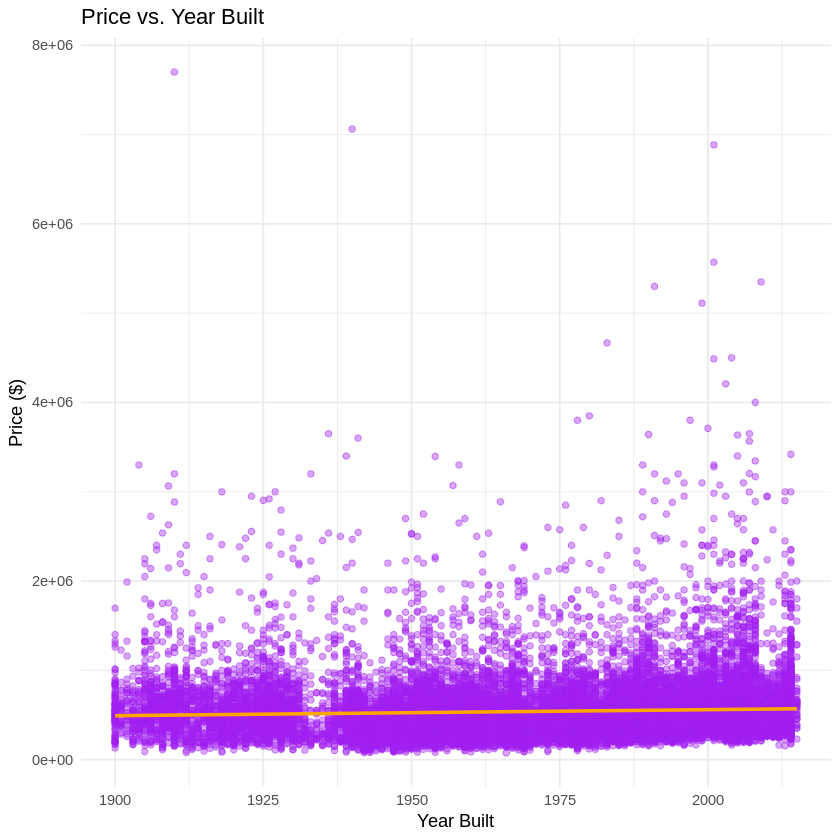

In [ ]:
# Scatterplot: Price vs. Living Area
ggplot(house_data, aes(x = sqft_living, y = price)) +
  geom_point(alpha = 0.4, color = "blue") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Price vs. Living Area", x = "Living Area (sqft)", y = "Price ($)") +
  theme_minimal()

# Scatterplot: Price vs. Number of Bedrooms
ggplot(house_data, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.4, color = "darkgreen") +
  labs(title = "Price vs. Number of Bedrooms", x = "Number of Bedrooms", y = "Price ($)") +
  theme_minimal()

# Scatterplot: Price vs. Year Built
ggplot(house_data, aes(x = yr_built, y = price)) +
  geom_point(alpha = 0.4, color = "purple") +
  geom_smooth(method = "lm", se = FALSE, color = "orange") +
  labs(title = "Price vs. Year Built", x = "Year Built", y = "Price ($)") +
  theme_minimal()


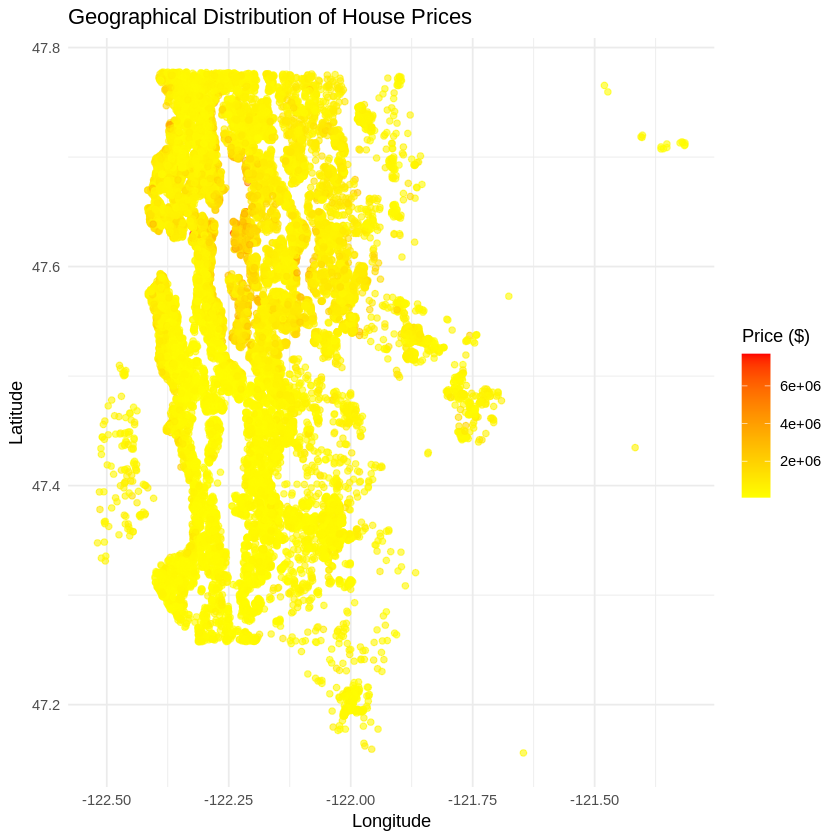

In [ ]:
# Geographical price distribution (latitude and longitude)
ggplot(house_data, aes(x = long, y = lat, color = price)) +
  geom_point(alpha = 0.6) +
  scale_color_gradient(low = "yellow", high = "red") +
  labs(title = "Geographical Distribution of House Prices", x = "Longitude", y = "Latitude", color = "Price ($)") +
  theme_minimal()

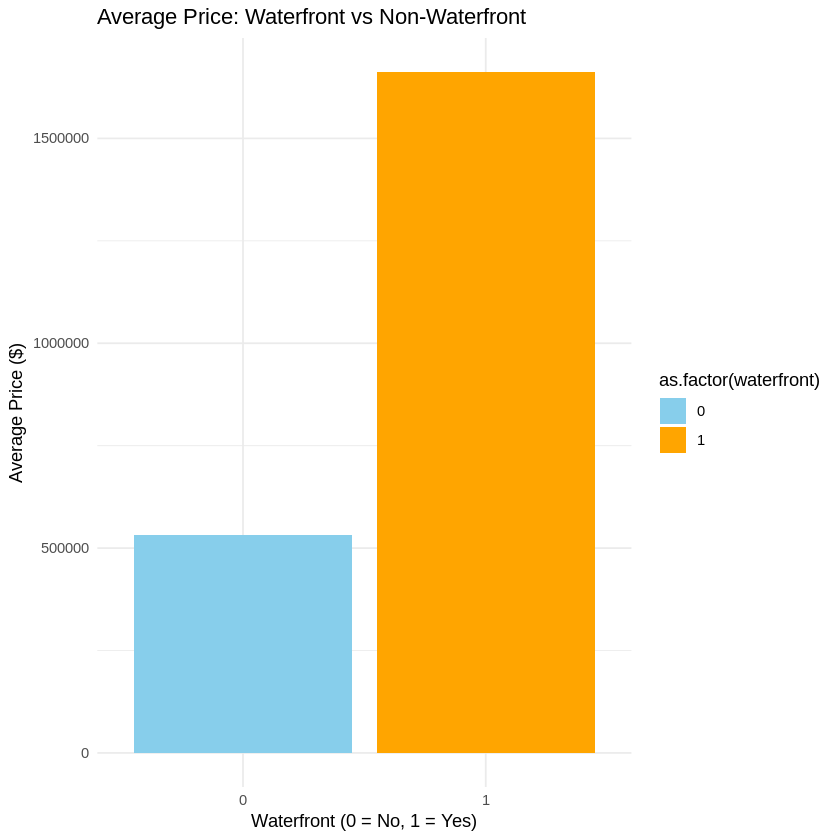

In [ ]:
# Aggregated analysis: Average price by waterfront
avg_price_waterfront <- house_data %>% group_by(waterfront) %>%
  summarise(Average_Price = mean(price, na.rm = TRUE))
ggplot(avg_price_waterfront, aes(x = as.factor(waterfront), y = Average_Price, fill = as.factor(waterfront))) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("skyblue", "orange")) +
  labs(title = "Average Price: Waterfront vs Non-Waterfront", x = "Waterfront (0 = No, 1 = Yes)", y = "Average Price ($)") +
  theme_minimal()


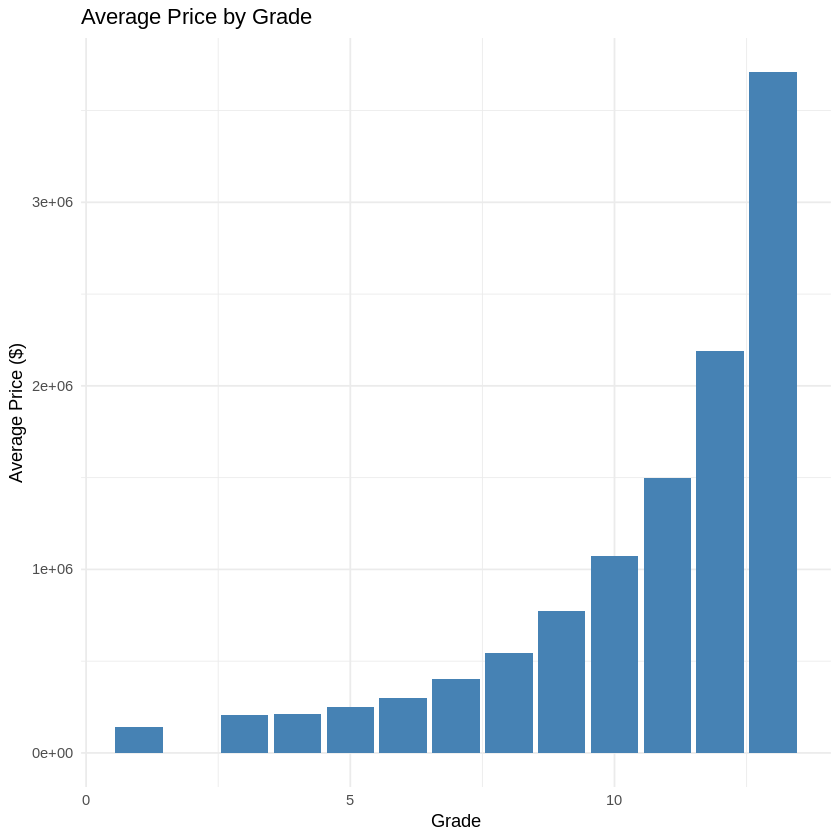

In [ ]:
# Additional analysis: Average price by grade
avg_price_grade <- house_data %>% group_by(grade) %>%
  summarise(Average_Price = mean(price, na.rm = TRUE))
ggplot(avg_price_grade, aes(x = grade, y = Average_Price)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Average Price by Grade", x = "Grade", y = "Average Price ($)") +
  theme_minimal()

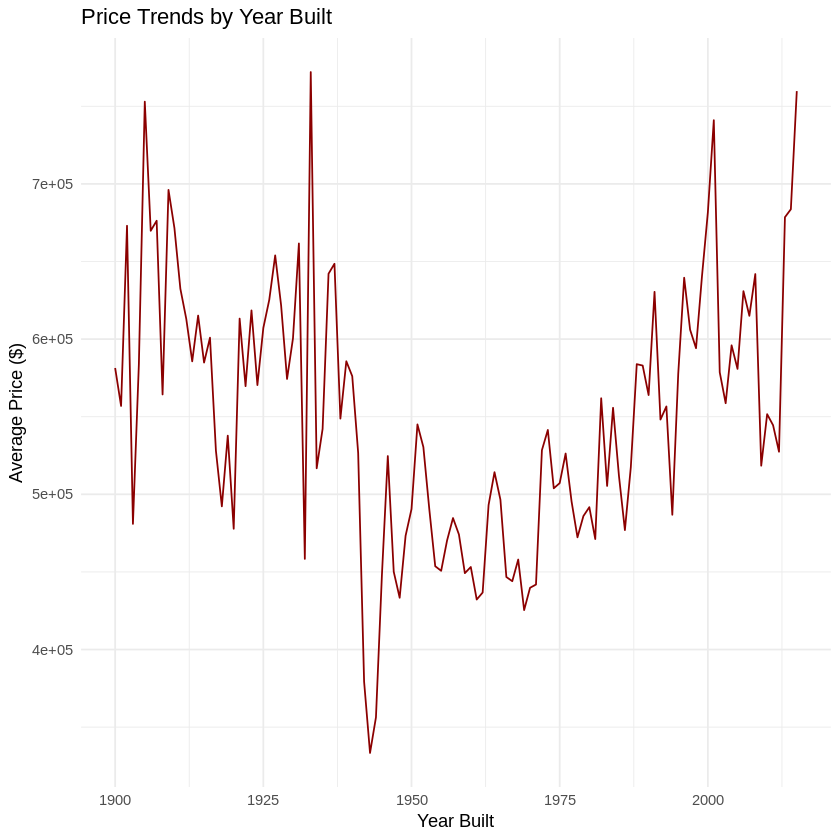

In [ ]:
# Additional analysis: Price trends by year built
avg_price_year <- house_data %>% group_by(yr_built) %>%
  summarise(Average_Price = mean(price, na.rm = TRUE))
ggplot(avg_price_year, aes(x = yr_built, y = Average_Price)) +
  geom_line(color = "darkred") +
  labs(title = "Price Trends by Year Built", x = "Year Built", y = "Average Price ($)") +
  theme_minimal()